In [1]:
import pandas as pd

In [2]:
DATA_FOLDER = '../data'
TRAINING_DATASET = f"{DATA_FOLDER}/train.csv"
TESTING_DATASET = f"{DATA_FOLDER}/test.csv"

train_data = pd.read_csv(TRAINING_DATASET)
test_data = pd.read_csv(TESTING_DATASET)

In [3]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_data.drop(['ADDRESS', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
test_data.drop(['ADDRESS', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)


### Feature Engineering (Categorical to Numerical)

In [5]:
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({
    'BHK': 1,
    'RK': 2
})

train_data['POSTED_BY'] = train_data['POSTED_BY'].map({
    'Owner': 1,
    'Dealer': 2,
    'Builder': 3
})

test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({
    'BHK': 1,
    'RK': 2
})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({
    'Owner': 1,
    'Dealer': 2,
    'Builder': 3
})

In [6]:
X = train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1)
y = train_data['TARGET(PRICE_IN_LACS)']

In [7]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,2,1,1300.236407,1,1
1,2,0,0,2,1,1275.000000,1,1
2,1,0,0,2,1,933.159722,1,1
3,1,0,1,2,1,929.921143,1,1
4,2,1,0,2,1,999.009247,0,1


In [8]:
y.head()

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print('Train Features Shape : ', X_train.shape, ':', 'Train Label Shape : ', Y_train.shape)
print('Validation Features Shape : ', X_val.shape, ':', 'Validation Label Shape : ', Y_val.shape)

Train Features Shape :  (26505, 8) : Train Label Shape :  (26505,)
Validation Features Shape :  (2946, 8) : Validation Label Shape :  (2946,)


In [10]:
models = dict()

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

print("Score on Training Data : ", lr.score(X_train, Y_train))
print("Score on Validation Data : ", lr.score(X_val, Y_val))

Score on Training Data :  0.14227124431420468
Score on Validation Data :  0.5023274505454409


In [12]:
models['lin_reg'] = lr.score(X_val, Y_val)

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

print("Score on Training Data : ", tree.score(X_train, Y_train))
print("Score on Validation Data : ", tree.score(X_val, Y_val))

Score on Training Data :  0.9958766562850353
Score on Validation Data :  0.6941338331394946


In [14]:
models['tree'] = tree.score(X_val, Y_val)

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, max_features=100)
forest.fit(X_train, Y_train)

print("Score on Training Data : ", forest.score(X_train, Y_train))
print("Score on Validation Data : ", forest.score(X_val, Y_val))

Score on Training Data :  0.9795183312246601
Score on Validation Data :  0.6873293445963912


In [16]:
models['forest'] = forest.score(X_val, Y_val)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
boosting.fit(X_train, Y_train)

print("Score on Training Data : ", boosting.score(X_train, Y_train))
print("Score on Validation Data : ", boosting.score(X_val, Y_val))

Score on Training Data :  0.9915515881521183
Score on Validation Data :  0.6951675269170032


In [18]:
models['boosting'] = boosting.score(X_val, Y_val)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

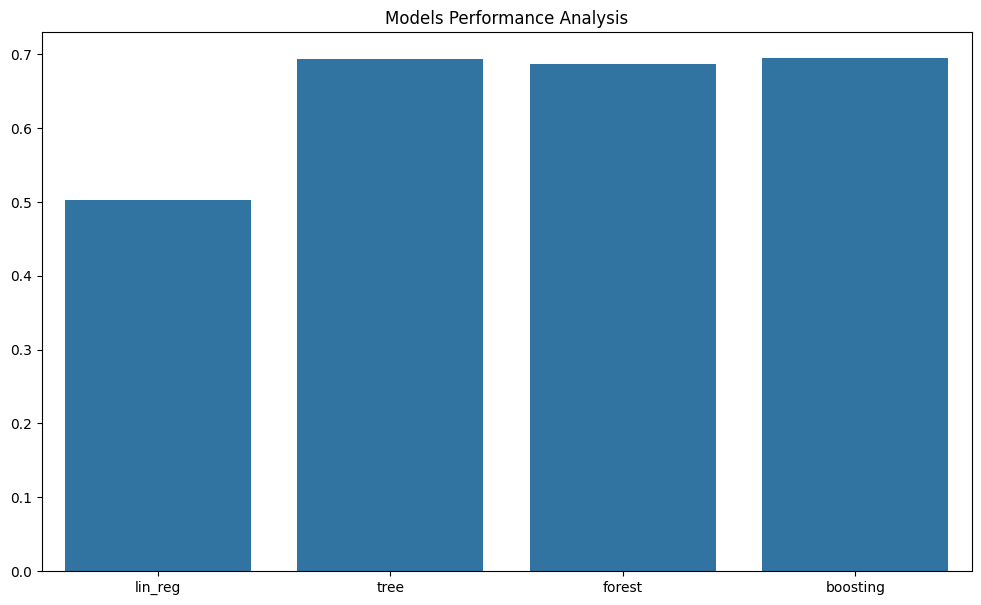

In [21]:
plt.figure(figsize=(12, 7))
keys = list(models.keys())
values = list(models.values())

sns.barplot(x = keys, y = values)

plt.title("Models Performance Analysis")
plt.show()

In [22]:
PREDICTED_OUTPUT_FILE = f"{DATA_FOLDER}/predicted_output.csv"

Y_pred = boosting.predict(test_data)
Y_pred = pd.DataFrame(Y_pred)
Y_pred.to_csv(PREDICTED_OUTPUT_FILE)

In [23]:
import pickle

In [26]:
MODELS_FOLDER = "../models"
MODELS_OUTPUT_FILE = f"{MODELS_FOLDER}/lgbm_model.pkl"

with open(MODELS_OUTPUT_FILE, "wb") as f:
    pickle.dump(boosting, f)